In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh, fmm

In [8]:
num_particles = 1000

terms_vals = np.arange(2, 21, dtype=int)

theta = 0.5

In [3]:
particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

bh_times = []
fmm_times = []

for terms in terms_vals:
    print(f'terms: {terms}')
    bh_method = bh.BH(particles, theta, terms)
    time = %timeit -o bh_method.do_method()
    bh_times.append(time)
    fmm_method = fmm.FMM(particles, terms)
    time = %timeit -o fmm_method.do_method()
    fmm_times.append(time)

terms: 2
763 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
191 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
terms: 3
728 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
197 ms ± 5.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
terms: 4
744 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
199 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
terms: 5
774 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
206 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
terms: 6
800 ms ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
234 ms ± 26.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
terms: 7
840 ms ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
217 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
terms: 8
862 ms ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
230 ms ± 6.77 ms per loop (mean ± std. dev. of 7

In [4]:
bh_averages = [time.average for time in bh_times]
bh_stdevs = [time.stdev for time in bh_times]
fmm_averages = [time.average for time in fmm_times]
fmm_stdevs = [time.stdev for time in fmm_times]

In [9]:
FILE_PATH = 'data/terms.npz'
np.savez(FILE_PATH,
    num_particles=num_particles,
    theta=theta,
    terms=terms,
    bh_averages=bh_averages,
    bh_stdevs=bh_stdevs,
    fmm_averages=fmm_averages,
    fmm_stdevs=fmm_stdevs,
    terms_vals=terms_vals
)

In [16]:
import importlib
importlib.reload(plots)

<module 'plots' from '/Users/liambrown/repositories/computing-project-lb880/tests/timings/plots.py'>

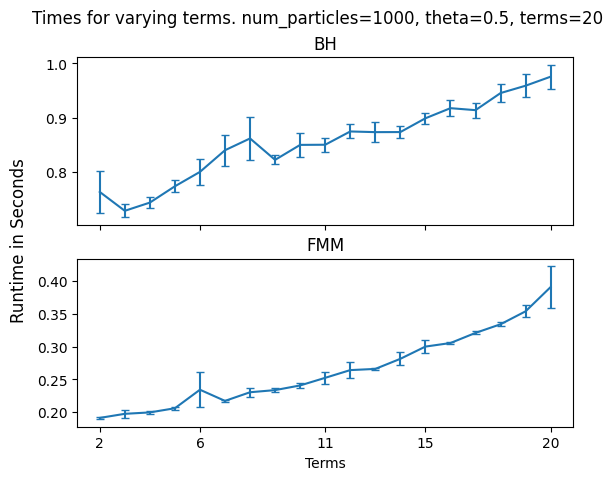

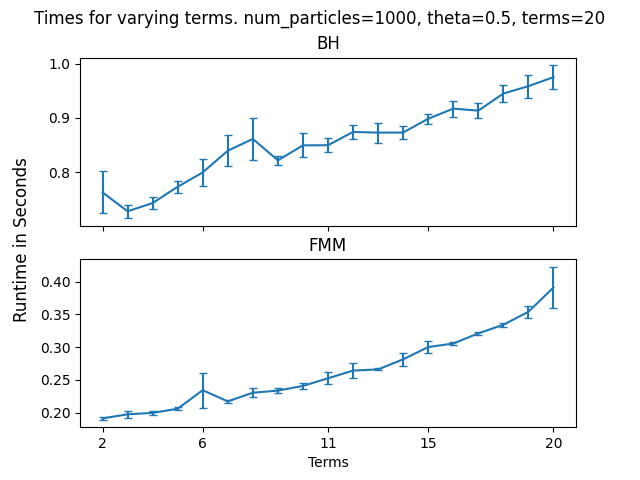

In [18]:
FILE_PATH = 'data/terms.npz'
fig = plots.terms(FILE_PATH)
fig